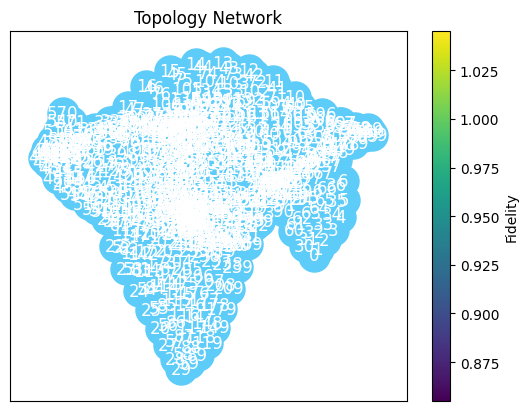

In [4]:
from components import *
import networkx as nx

rede = Network()
#rede.set_fully_connected_topology(20)
rede.set_lattice_topology(20, 30)
controlador = Controller()
controlador.set_network(rede)

rede.draw()

In [5]:
#paths = list(nx.shortest_simple_paths(rede.G, 0, 3))
#print(paths)

In [6]:
from itertools import islice
def k_shortest_paths(G, source, target, k, weight=None):
    return list(
        islice(nx.shortest_simple_paths(G, source, target, weight=weight), k)
    )
k_shortest_paths(rede.G, 0, 3, 8)

[[0, 1, 2, 3],
 [0, 30, 31, 1, 2, 3],
 [0, 1, 31, 32, 2, 3],
 [0, 1, 2, 32, 33, 3],
 [0, 30, 31, 32, 2, 3],
 [0, 1, 31, 32, 33, 3],
 [0, 30, 31, 32, 33, 3],
 [0, 30, 60, 61, 31, 1, 2, 3]]